In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def load_data(data_path):
    data_set = np.genfromtxt(data_path, delimiter=',')
    return data_set

In [3]:
def visualize_data(data, label_x, label_y, label_pos, label_neg):
    #get label 
    neg = data[:,2] == -1
    pos = data[:,2] == 1
    
    plt.scatter(data[pos][:,0], data[pos][:,1], c='g', s=30, label=label_pos)
    plt.scatter(data[neg][:,0], data[neg][:,1], c='r', s=30, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon= True, fancybox = True);
    plt.show()

In [4]:
def plot_decision_boundary(X, Y, theta, title, label_x, label_y, label_pos, label_neg):
    #get label
    m=X.shape[1]
    X=X.T
    Y=Y.T
    theta = theta.T
    neg = (Y == -1).reshape(m,1)
    pos = (Y == 1).reshape(m,1)
    
    
    plt.scatter(X[pos[:,0],1],X[pos[:,0],2], c="g", s = 60, label=label_pos)
    plt.scatter(X[neg[:,0],1],X[neg[:,0],2], c="r", s = 60, label=label_neg)
    
    x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
    y_value=-(theta[0] +theta[1]*x_value)/theta[2]

    plt.plot(x_value, y_value, "b")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon= True, fancybox = True)
    plt.show()

In [5]:
def predict(w, x):
    #return -1 if <0, 0 if =0, 1 if >0
    return np.sign(np.dot(w, x))

In [6]:
def hasConverged(X, y, w):
    return np.array_equal(predict(w,X), y)

In [7]:
def perceptron(X, y, w, max_iteration=1000):
    #get dimension and number of data points
    n , m = X.shape[0], X.shape[1]
    iteration = 0
    #loop until converge or reach maximum interations
    print("Looping....")
    while True:
        #for every data point
        for i in range(m):
            #get a data point 
            xi = X[:,i].reshape(n,1)
            yi = y[0,i]
            #check if the data point has correct label
            if predict(w, xi)[0][0] != yi:
                #if not, update the weights
                w = w + np.dot(yi, xi.T)
        
        #check converge
        if hasConverged(X, y, w):
            print("There aren't any mispoints, break the loop")
            break
        
        #update the count
        iteration +=1
        
        #if reach max iteration, break
        if(iteration == max_iteration):
            print("Reach maximum iterations, break the loop")
            break
    
    return w

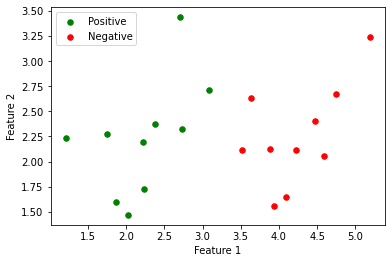

(3, 20)
(1, 20)
w shape:  (1, 3)
Looping....
There aren't any mispoints, break the loop
weights:  [[ 2.         -3.70639369  4.07118694]]
Label of x:  True


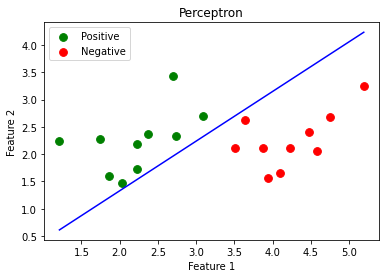

In [8]:
if __name__ == "__main__":
    #Create random dataset
    data_path = 'data3.csv'
    data_set = load_data(data_path)
    visualize_data(data_set, 'Feature 1', 'Feature 2', 'Positive', 'Negative')
    
    #load training input to matrix X
    X_orgs = data_set[:, 0:2]

    #add 1's column to X
    m = X_orgs.shape[0]
    one = np.ones((X_orgs.shape[0], 1))
    X = np.concatenate((one, X_orgs), axis = 1)
    X = X.T
    
    #load label to matrix X
    Y = data_set[:, 2].reshape((1,X.shape[1]))
    
    #print shape of data
    print(X.shape)
    print(Y.shape)
    
    #initizlize weights
    #w = np.random.randn(1,X.shape[0])*0.01
    w = np.zeros((1, X.shape[0]))
    print("w shape: ",w.shape)
    
    #compute the weights 
    w = perceptron(X,Y,w, 1000)
    
    print("weights: ",w)
    
    #predict 
    x = np.array([[1,2.220960568758366,2.1957972786471043]])
    print("Label of x: ", predict(w, x.T)[0][0] > 0)
    
    #plot the decision boundary 
    plot_decision_boundary(X, Y, w, "Perceptron", "Feature 1", "Feature 2", "Positive", "Negative")


    
    